# 기후 변수 EDA

 크롤링한 외부 경제지표 데이터와 내부 취급액 데이터 간 EDA를 진행한다.
 
- 경제심리지수
- 코스피
- 전산업생산지수
- 고용률
- 개인별신용카드사용액
- 생활물가지수
- 생산자물가지수
- 소비자물가지수

In [1]:
# 모듈 불러오기
import warnings 
warnings.filterwarnings(action='ignore')

import pandas as pd
pd.set_option('display.max_rows', 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
%config InlineBackend.figure_format = 'retina'

In [2]:
# 경로 설정
NAME_CHANGED_DATA = './data/시간분리데이터(상품명통일).xlsx'
ECON_SENT_INDEX = './data/경제심리지수.xlsx'
KOSPI = './data/코스피.xlsx'
INDU_PROD_INDEX = './data/전산업생산지수.xlsx'
EMPLOYMENT = './data/고용률.xlsx'
CREDIT = './data/개인별신용카드사용액.xlsx'
LIFE_PRICE = './data/생활물가지수.xlsx'
PRODUCER_PRICE_TOTAL = './data/생산자물가지수(전체).xlsx'
PRODUCER_PRICE = './data/생산자물가지수.xlsx'
CONSUMER_PRICE = './data/소비자물가지수.xlsx'

In [3]:
# 데이터 로드
df_raw = pd.read_excel(NAME_CHANGED_DATA, usecols=lambda x: 'Unnamed' not in x)
df_econ = pd.read_excel(ECON_SENT_INDEX, usecols=lambda x: 'Unnamed' not in x)
df_kospi = pd.read_excel(KOSPI, usecols=lambda x: 'Unnamed' not in x)
df_industry = pd.read_excel(INDU_PROD_INDEX, usecols=lambda x: 'Unnamed' not in x)
df_employ = pd.read_excel(EMPLOYMENT, usecols=lambda x: 'Unnamed' not in x)
df_credit = pd.read_excel(CREDIT, usecols=lambda x: 'Unnamed' not in x)
df_life = pd.read_excel(LIFE_PRICE, usecols=lambda x: 'Unnamed' not in x)
df_producer_total = pd.read_excel(PRODUCER_PRICE_TOTAL, usecols=lambda x: 'Unnamed' not in x)
df_producer = pd.read_excel(PRODUCER_PRICE, usecols=lambda x: 'Unnamed' not in x)
df_consumer = pd.read_excel(CONSUMER_PRICE, usecols=lambda x: 'Unnamed' not in x)

In [4]:
# 원래 데이터에 계절, 월, 일, 방송시간대 컬럼 추가
df_raw['월'] = df_raw['방송시작'].dt.month
season_mapping_dict = {1:'겨울', 2:'겨울', 3:'봄', 4:'봄', 5:'봄', 6:'여름', 7:'여름', 8:'여름', 9:'가을', 10:'가을', 11:'가을', 12:'겨울'}
df_raw['계절'] = df_raw['월'].map(season_mapping_dict)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13239 entries, 0 to 13238
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   마더코드    13239 non-null  int64         
 1   상품코드    13239 non-null  int64         
 2   상품군     13239 non-null  object        
 3   상품명_통일  13239 non-null  object        
 4   방송시작    13239 non-null  datetime64[ns]
 5   방송종료    13239 non-null  datetime64[ns]
 6   노출(분)   13239 non-null  float64       
 7   판매단가    13239 non-null  int64         
 8   취급액     13239 non-null  int64         
 9   월       13239 non-null  int64         
 10  계절      13239 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(5), object(3)
memory usage: 1.1+ MB


In [ ]:
ECON_SENT_INDEX = './data/경제심리지수.xlsx'
KOSPI = './data/코스피.xlsx'
INDU_PROD_INDEX = './data/전산업생산지수.xlsx'
EMPLOYMENT = './data/고용률.xlsx'
CREDIT = './data/개인별신용카드사용액.xlsx'
LIFE_PRICE = './data/생활물가지수.xlsx'
PRODUCER_PRICE_TOTAL = './data/생산자물가지수(전체).xlsx'
PRODUCER_PRICE = './data/생산자물가지수.xlsx'
CONSUMER_PRICE = './data/소비자물가지수.xlsx'

# 외부 경제 지표 추이 파악

============ 지수: 경제심리지수 ============


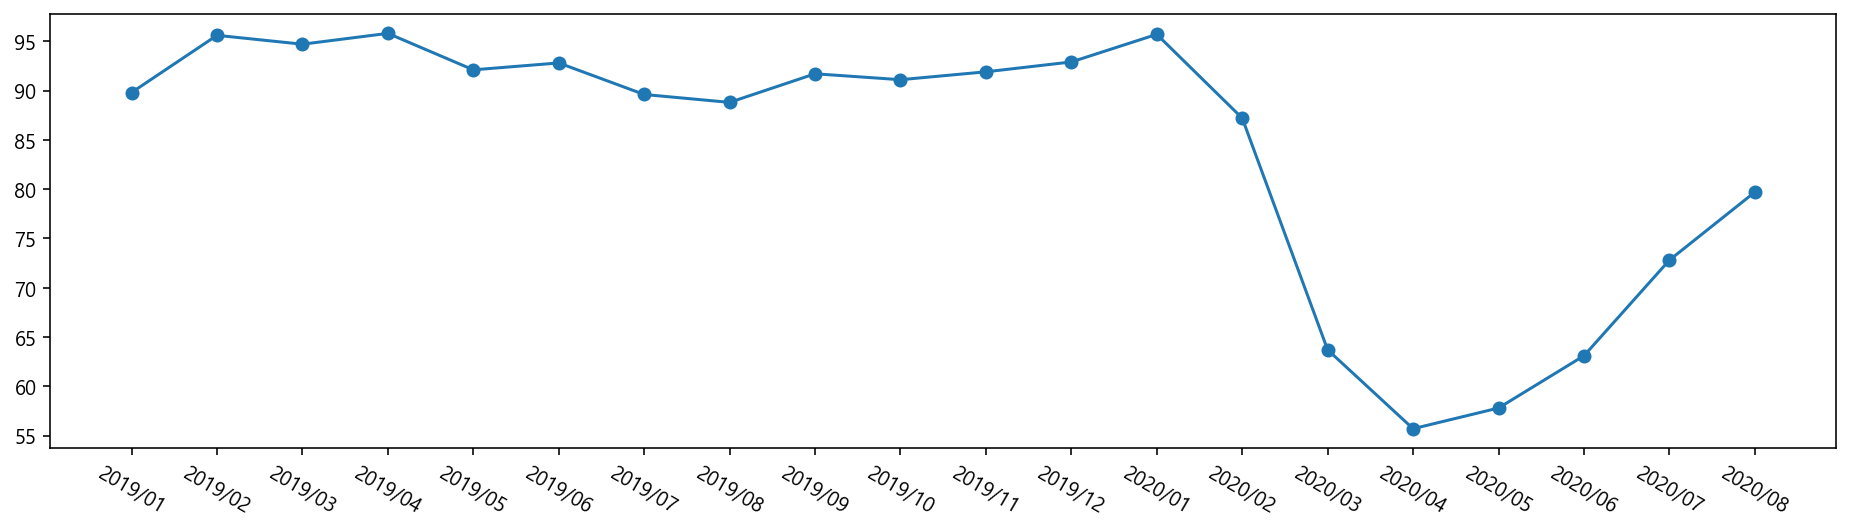


============ 지수: 코스피 ============


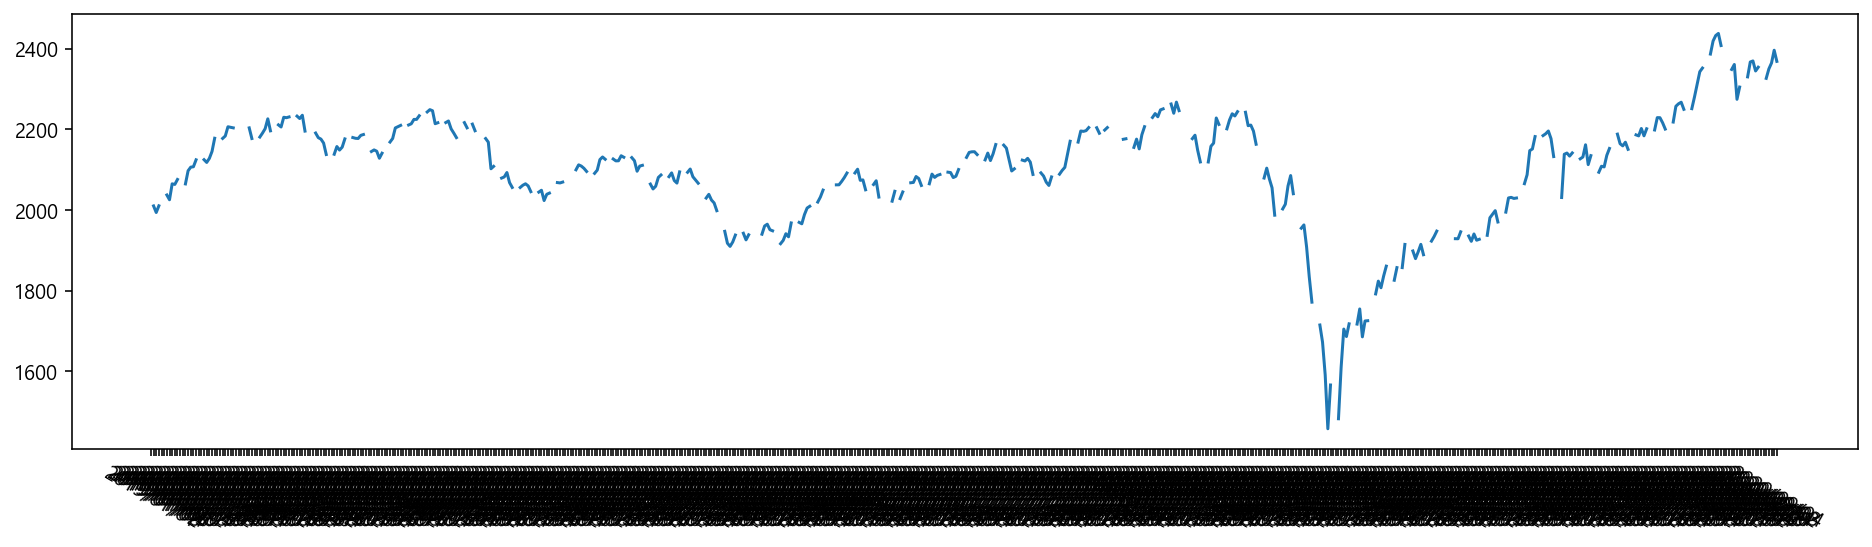


============ 지수: 전산업생산지수 ============


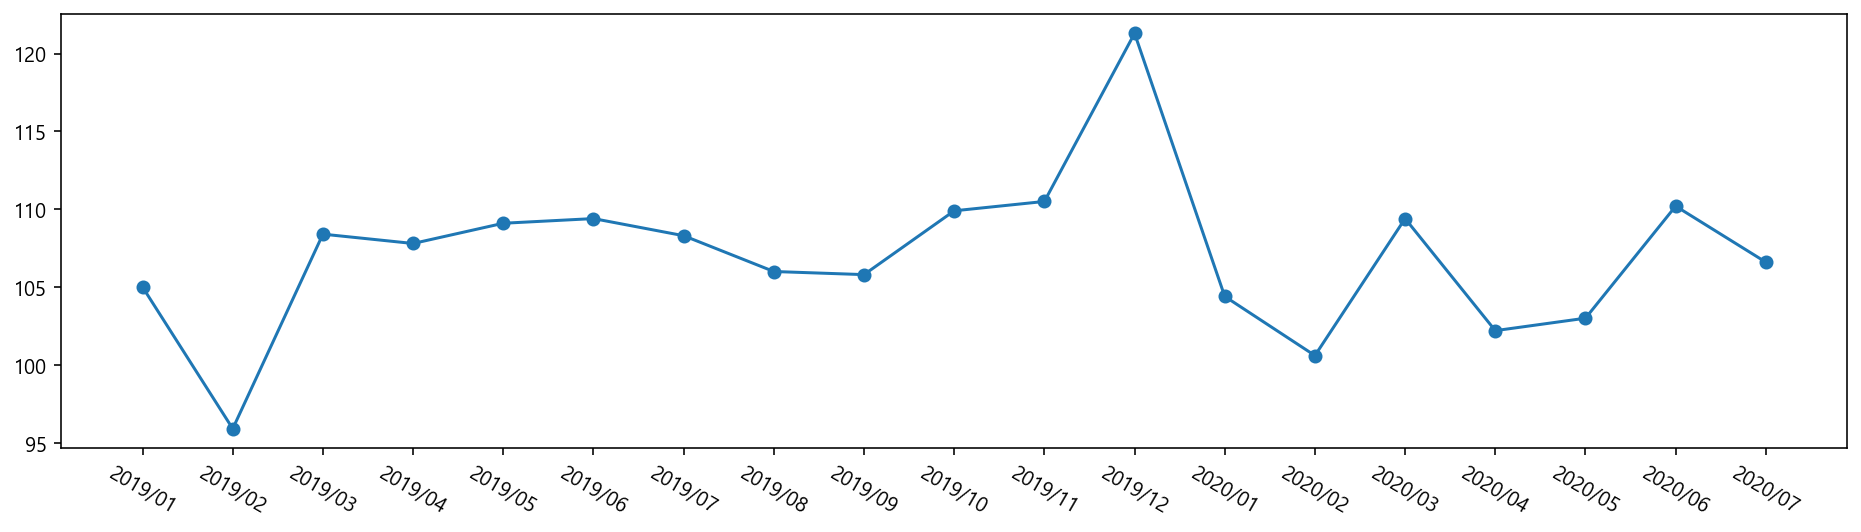


============ 지수: 고용률 ============


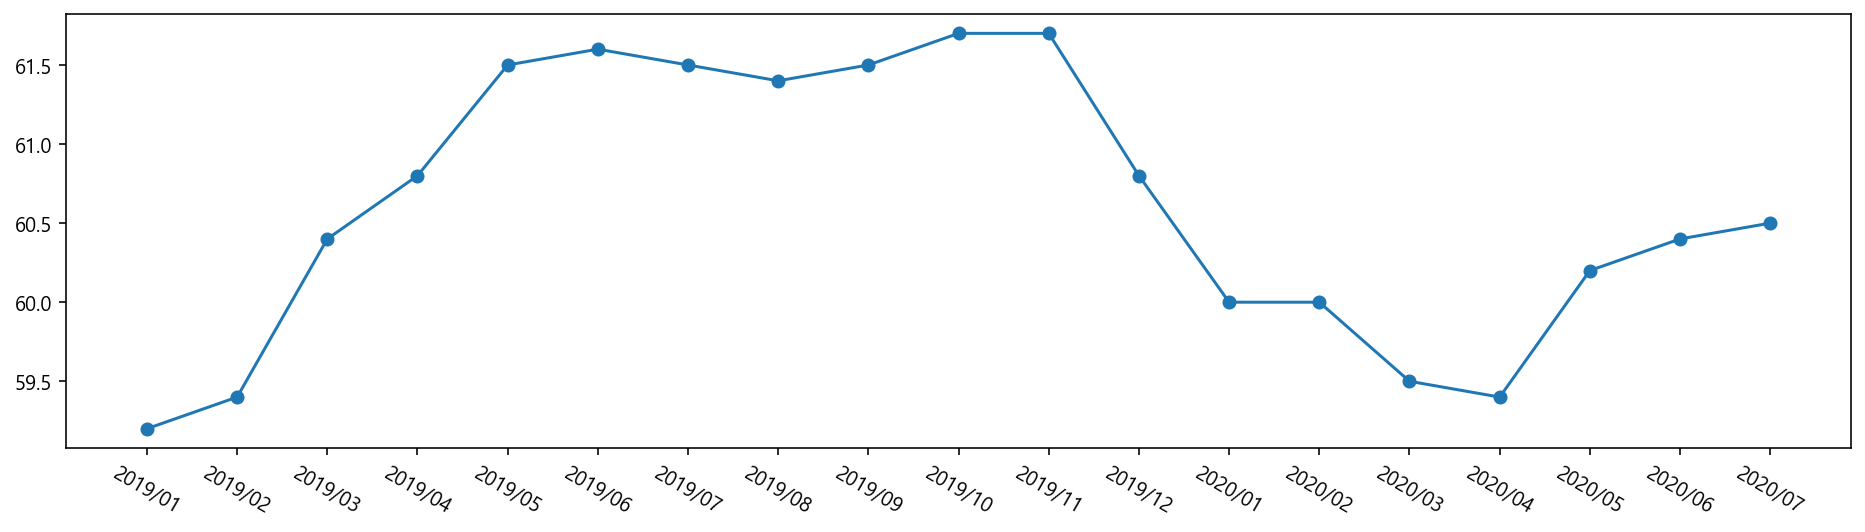


============ 지수: 개인별신용카드사용액 ============


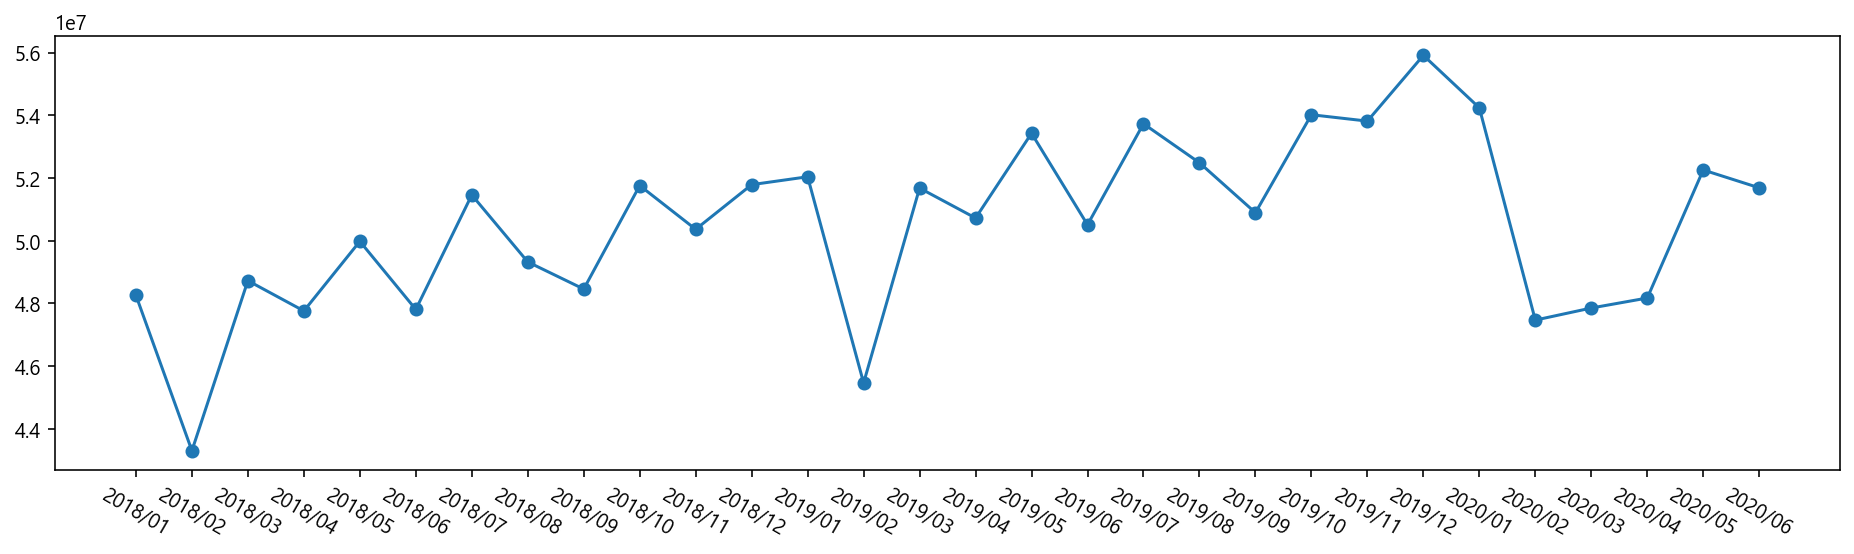


============ 지수: 생활물가지수 ============


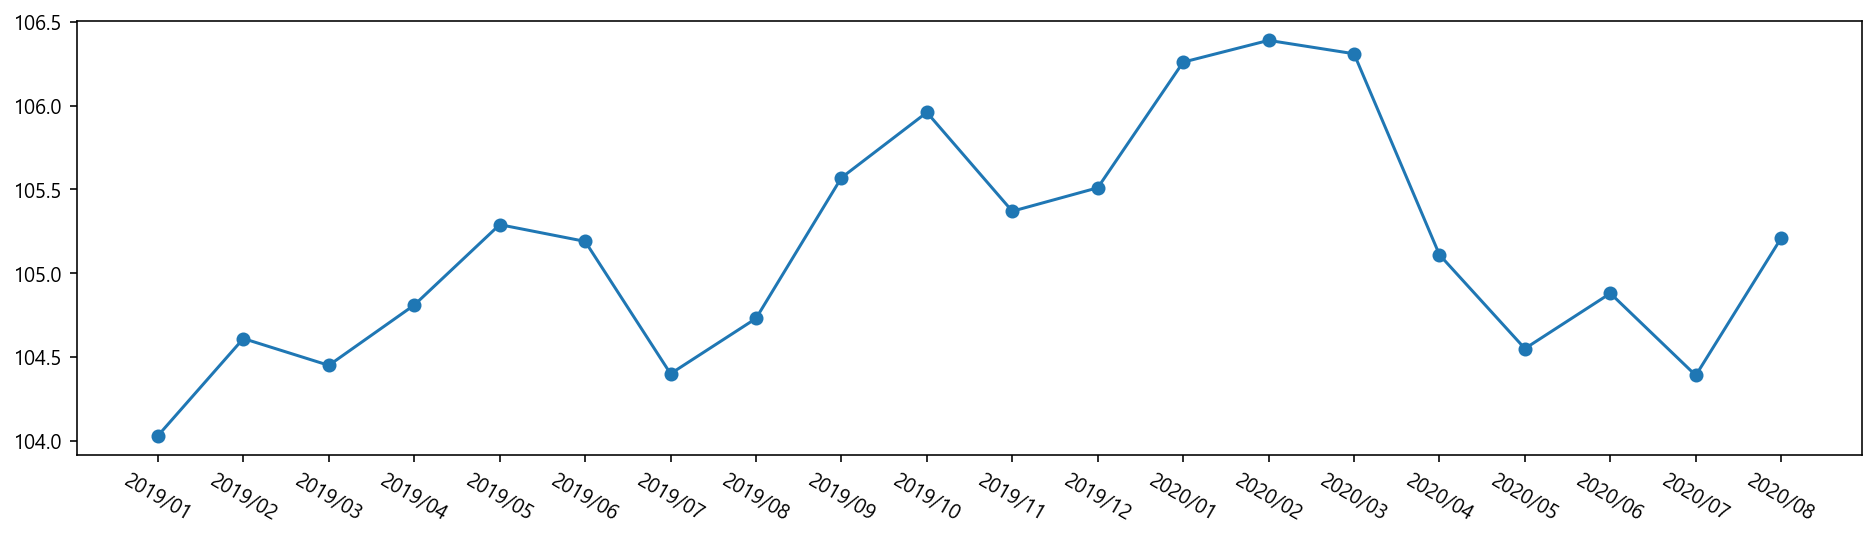


============ 지수: 생산자물가지수 ============


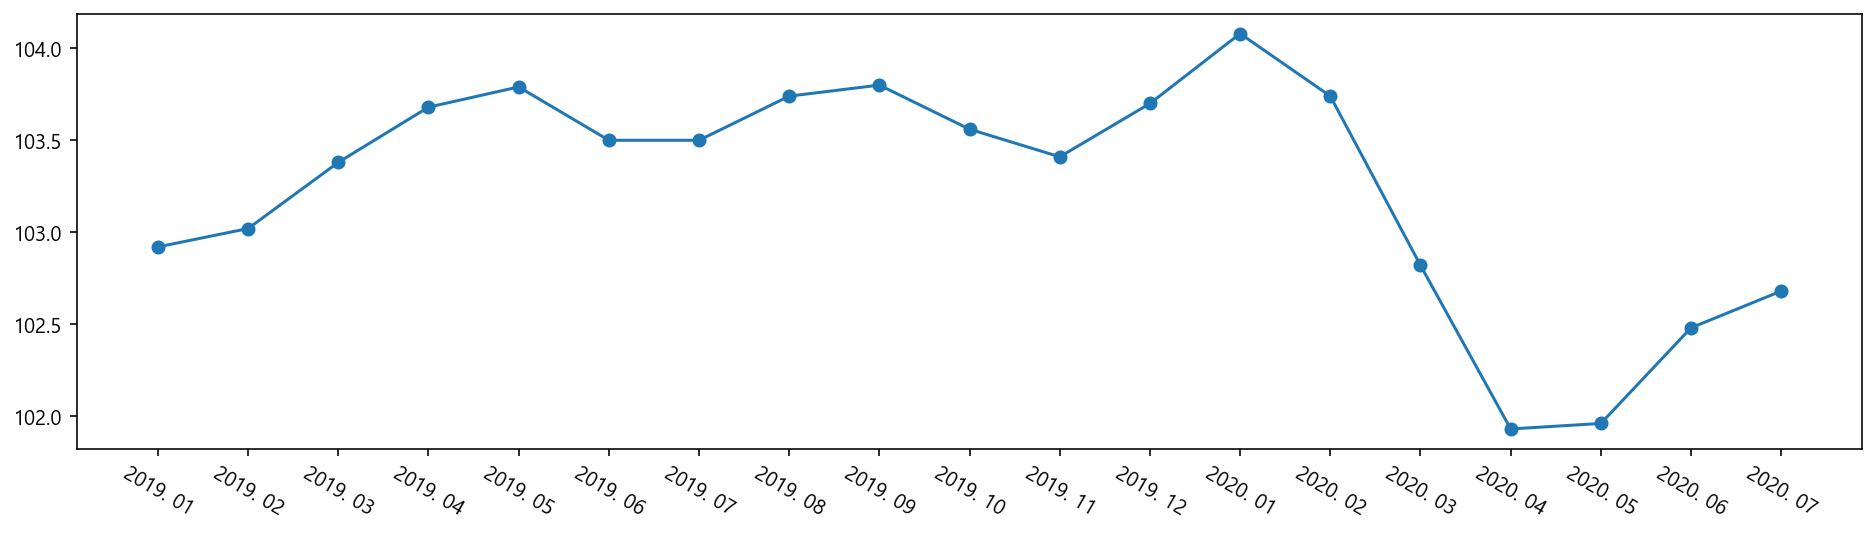


============ 지수: 소비자물가지수 ============


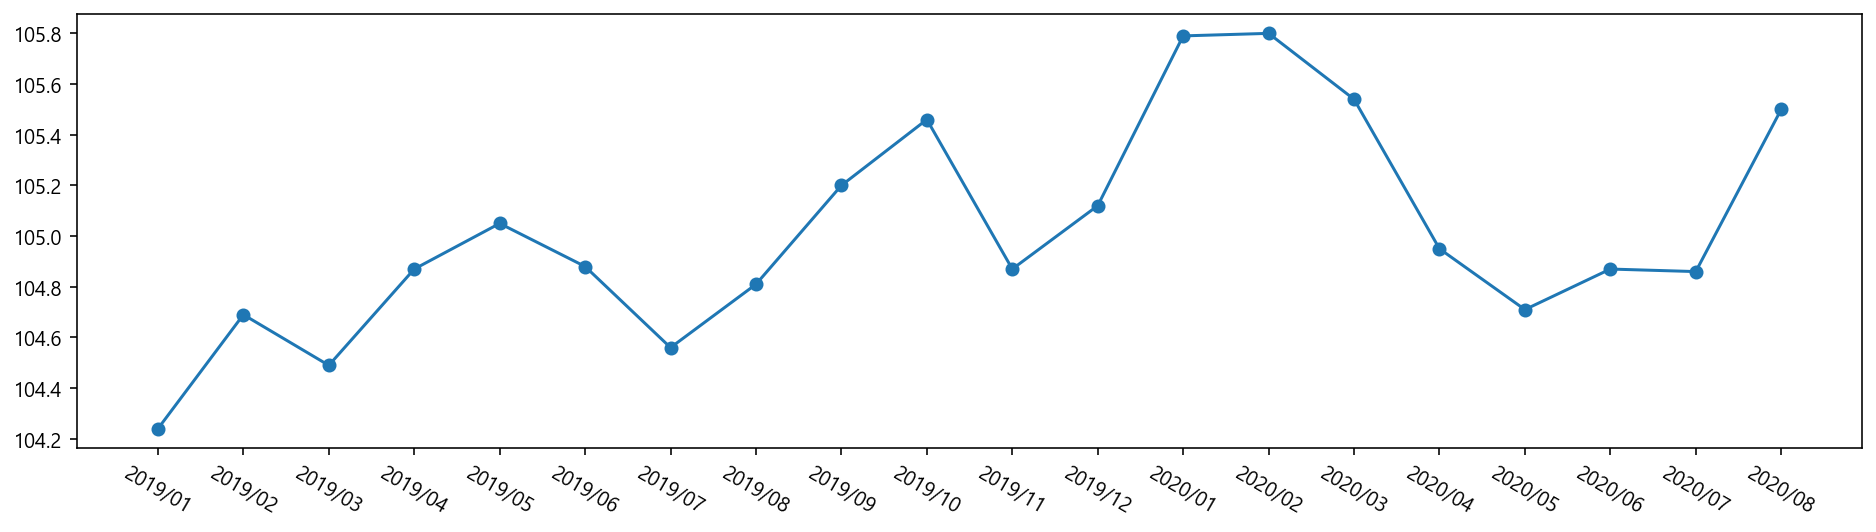

In [64]:
external_df = [df_econ, df_kospi, df_industry, df_employ, df_credit, df_life, df_producer_total, df_consumer]
external_index = ['경제심리지수', '코스피', '전산업생산지수', '고용률', '개인별신용카드사용액', '생활물가지수', '생산자물가지수', '소비자물가지수']
for df, name in zip(external_df, external_index):
    print(f"============ 지수: {name} ============")
    plt.figure(figsize=(16, 4))
    if name == '코스피':
        plt.plot(df.iloc[:, 0], df.iloc[:, -1])
    else:
        plt.plot(df.iloc[:, 0], df.iloc[:, -1], marker='o')
    plt.xticks(rotation=-30)
    plt.show()
    print()

# 전체 데이터와 월별 지수 간 관계
- 코스피는 월말 데이터로 확인

In [5]:
# 코스피 말일 데이터 
df_kospi_ffill = df_kospi.copy()
df_kospi_ffill['코스피'] = df_kospi['코스피'].fillna(method='ffill') # 주말이라 없는 데이터
last_days = ['2019/01/31', '2019/02/28', '2019/03/31', '2019/04/30', '2019/05/31', '2019/06/30', '2019/07/31',
            '2019/08/31', '2019/09/30', '2019/10/31', '2019/11/30', '2019/12/31']
kospi_last = df_kospi_ffill.loc[df_kospi_ffill['시점'].isin(last_days)]
kospi_last

,시점,코스피
30,2019/01/31,2204.85
58,2019/02/28,2195.44
89,2019/03/31,2140.67
119,2019/04/30,2203.59
150,2019/05/31,2041.74
180,2019/06/30,2130.62
211,2019/07/31,2024.55
242,2019/08/31,1967.79
272,2019/09/30,2063.05
303,2019/10/31,2083.48


In [15]:
# 지수 합치기
df_all_grouped_by_month = df_raw.groupby(by='월', as_index=False)['취급액'].sum()
df_all_grouped_by_month['경제심리지수'] = df_econ.iloc[:12, -1]
df_all_grouped_by_month['코스피'] = kospi_last['코스피'].tolist()
df_all_grouped_by_month['전산업생산지수'] = df_industry.iloc[:12, -1]
df_all_grouped_by_month['고용률'] = df_employ.iloc[:12, -1]
df_all_grouped_by_month['개인별신용카드사용액'] = df_credit.iloc[12:24, -1].tolist()
df_all_grouped_by_month['생활물가지수'] = df_life.iloc[:12, -1]
df_all_grouped_by_month['생산자물가지수'] = df_producer_total.iloc[:12, -1]
df_all_grouped_by_month['소비자물가지수'] = df_consumer.iloc[:12, -1]
df_all_grouped_by_month

,월,취급액,경제심리지수,코스피,전산업생산지수,고용률,개인별신용카드사용액,생활물가지수,생산자물가지수,소비자물가지수
0,1,68705807000,89.8,2204.85,105.0,59.2,52039328,104.03,102.92,104.24
1,2,59581381000,95.6,2195.44,95.9,59.4,45466358,104.61,103.02,104.69
2,3,64672766000,94.7,2140.67,108.4,60.4,51678679,104.45,103.38,104.49
3,4,60226081000,95.8,2203.59,107.8,60.8,50723386,104.81,103.68,104.87
4,5,68635995000,92.1,2041.74,109.1,61.5,53425506,105.29,103.79,105.05
5,6,66314171000,92.8,2130.62,109.4,61.6,50508891,105.19,103.50,104.88
6,7,68971461000,89.6,2024.55,108.3,61.5,53730267,104.40,103.50,104.56
7,8,69073374000,88.8,1967.79,106.0,61.4,52485647,104.73,103.74,104.81
8,9,67407686000,91.7,2063.05,105.8,61.5,50893769,105.57,103.80,105.20
9,10,68843479000,91.1,2083.48,109.9,61.7,54017093,105.96,103.56,105.46


In [57]:
# 지수 자료 보관
df_index_concat = df_all_grouped_by_month.iloc[:, 2:]
df_index_concat['월'] = range(1, 13)

,취급액,경제심리지수,코스피,전산업생산지수,고용률,개인별신용카드사용액,생활물가지수,생산자물가지수,소비자물가지수
취급액,1.000000,-0.493515,-0.180595,0.802549,0.341541,0.834220,0.396742,0.279860,0.268260
경제심리지수,-0.493515,1.000000,0.661695,-0.136127,-0.319877,-0.522287,0.028705,-0.109686,0.037740
코스피,-0.180595,0.661695,1.000000,0.009876,-0.703145,-0.317316,-0.202345,-0.531883,-0.249239
전산업생산지수,0.802549,-0.136127,0.009876,1.000000,0.450518,0.859630,0.465245,0.515621,0.379581
고용률,0.341541,-0.319877,-0.703145,0.450518,1.000000,0.516617,0.667465,0.790208,0.648612
개인별신용카드사용액,0.834220,-0.522287,-0.317316,0.859630,0.516617,1.000000,0.353880,0.468298,0.287255
생활물가지수,0.396742,0.028705,-0.202345,0.465245,0.667465,0.353880,1.000000,0.608796,0.962830
생산자물가지수,0.279860,-0.109686,-0.531883,0.515621,0.790208,0.468298,0.608796,1.000000,0.687302
소비자물가지수,0.268260,0.037740,-0.249239,0.379581,0.648612,0.287255,0.962830,0.687302,1.000000


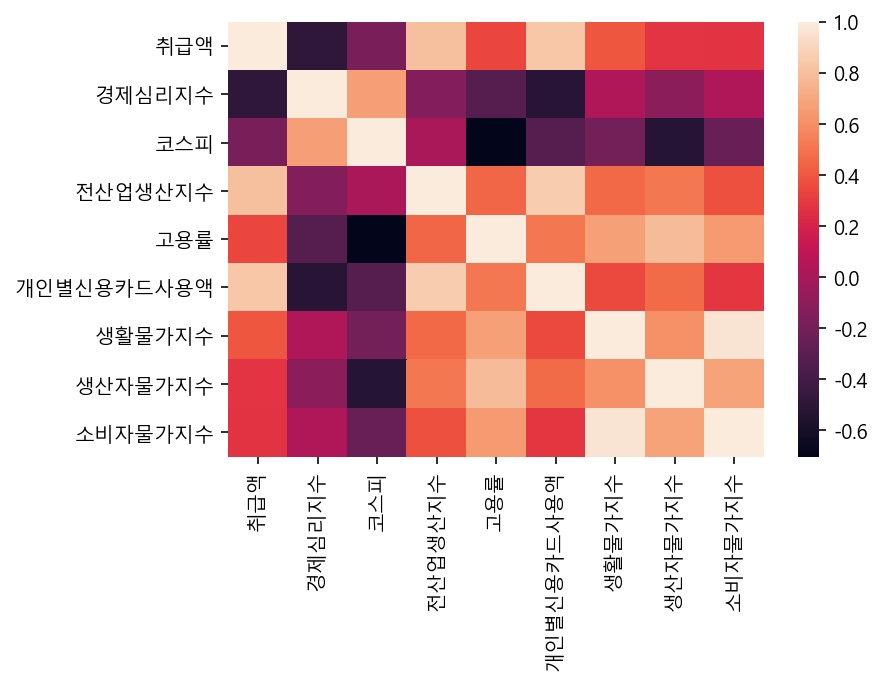

In [55]:
# 월 전체 취급액과 경제 지표 간 상관관계
display(df_all_grouped_by_month[['취급액', '경제심리지수', '코스피', '전산업생산지수', '고용률', '개인별신용카드사용액', \
                              '생활물가지수', '생산자물가지수', '소비자물가지수']].corr())
sns.heatmap(df_all_grouped_by_month[['취급액', '경제심리지수', '코스피', '전산업생산지수', '고용률', '개인별신용카드사용액', \
                              '생활물가지수', '생산자물가지수', '소비자물가지수']].corr())
plt.show()

In [53]:
# 상품군별 월별 취급액 합계
pgroups = df_raw['상품군'].unique()
for pgroup in pgroups:
    print(f"============ 상품군: {pgroup} ============")
    temp = df_raw.loc[df_raw['상품군'] == pgroup].groupby(by=['상품군', '월'], as_index=False)['취급액'].sum()
    temp_index_merged = temp.merge(df_index_concat, how='left')
    display(temp_index_merged[['취급액', '경제심리지수', '코스피', '전산업생산지수', '고용률', '개인별신용카드사용액', \
                              '생활물가지수', '생산자물가지수', '소비자물가지수']].corr())
    print()

============ 상품군: 이미용 ============


,취급액,경제심리지수,코스피,전산업생산지수,고용률,개인별신용카드사용액,생활물가지수,생산자물가지수,소비자물가지수
취급액,1.000000,-0.071531,0.176949,0.630107,0.173945,0.533137,0.542714,0.109884,0.408578
경제심리지수,-0.071531,1.000000,0.661695,-0.136127,-0.319877,-0.522287,0.028705,-0.109686,0.037740
코스피,0.176949,0.661695,1.000000,0.009876,-0.703145,-0.317316,-0.202345,-0.531883,-0.249239
전산업생산지수,0.630107,-0.136127,0.009876,1.000000,0.450518,0.859630,0.465245,0.515621,0.379581
고용률,0.173945,-0.319877,-0.703145,0.450518,1.000000,0.516617,0.667465,0.790208,0.648612
개인별신용카드사용액,0.533137,-0.522287,-0.317316,0.859630,0.516617,1.000000,0.353880,0.468298,0.287255
생활물가지수,0.542714,0.028705,-0.202345,0.465245,0.667465,0.353880,1.000000,0.608796,0.962830
생산자물가지수,0.109884,-0.109686,-0.531883,0.515621,0.790208,0.468298,0.608796,1.000000,0.687302
소비자물가지수,0.408578,0.037740,-0.249239,0.379581,0.648612,0.287255,0.962830,0.687302,1.000000



============ 상품군: 주방 ============


,취급액,경제심리지수,코스피,전산업생산지수,고용률,개인별신용카드사용액,생활물가지수,생산자물가지수,소비자물가지수
취급액,1.000000,0.204465,0.665632,0.100990,-0.522743,-0.083271,-0.420098,-0.391632,-0.463763
경제심리지수,0.204465,1.000000,0.661695,-0.136127,-0.319877,-0.522287,0.028705,-0.109686,0.037740
코스피,0.665632,0.661695,1.000000,0.009876,-0.703145,-0.317316,-0.202345,-0.531883,-0.249239
전산업생산지수,0.100990,-0.136127,0.009876,1.000000,0.450518,0.859630,0.465245,0.515621,0.379581
고용률,-0.522743,-0.319877,-0.703145,0.450518,1.000000,0.516617,0.667465,0.790208,0.648612
개인별신용카드사용액,-0.083271,-0.522287,-0.317316,0.859630,0.516617,1.000000,0.353880,0.468298,0.287255
생활물가지수,-0.420098,0.028705,-0.202345,0.465245,0.667465,0.353880,1.000000,0.608796,0.962830
생산자물가지수,-0.391632,-0.109686,-0.531883,0.515621,0.790208,0.468298,0.608796,1.000000,0.687302
소비자물가지수,-0.463763,0.037740,-0.249239,0.379581,0.648612,0.287255,0.962830,0.687302,1.000000



============ 상품군: 농수축 ============


,취급액,경제심리지수,코스피,전산업생산지수,고용률,개인별신용카드사용액,생활물가지수,생산자물가지수,소비자물가지수
취급액,1.000000,-0.788284,-0.344890,-0.045324,-0.026997,0.241929,0.012333,-0.082382,0.012496
경제심리지수,-0.788284,1.000000,0.661695,-0.136127,-0.319877,-0.522287,0.028705,-0.109686,0.037740
코스피,-0.344890,0.661695,1.000000,0.009876,-0.703145,-0.317316,-0.202345,-0.531883,-0.249239
전산업생산지수,-0.045324,-0.136127,0.009876,1.000000,0.450518,0.859630,0.465245,0.515621,0.379581
고용률,-0.026997,-0.319877,-0.703145,0.450518,1.000000,0.516617,0.667465,0.790208,0.648612
개인별신용카드사용액,0.241929,-0.522287,-0.317316,0.859630,0.516617,1.000000,0.353880,0.468298,0.287255
생활물가지수,0.012333,0.028705,-0.202345,0.465245,0.667465,0.353880,1.000000,0.608796,0.962830
생산자물가지수,-0.082382,-0.109686,-0.531883,0.515621,0.790208,0.468298,0.608796,1.000000,0.687302
소비자물가지수,0.012496,0.037740,-0.249239,0.379581,0.648612,0.287255,0.962830,0.687302,1.000000



============ 상품군: 잡화 ============


,취급액,경제심리지수,코스피,전산업생산지수,고용률,개인별신용카드사용액,생활물가지수,생산자물가지수,소비자물가지수
취급액,1.000000,-0.283927,-0.708859,0.140544,0.663903,0.261449,0.498512,0.692545,0.564360
경제심리지수,-0.283927,1.000000,0.661695,-0.136127,-0.319877,-0.522287,0.028705,-0.109686,0.037740
코스피,-0.708859,0.661695,1.000000,0.009876,-0.703145,-0.317316,-0.202345,-0.531883,-0.249239
전산업생산지수,0.140544,-0.136127,0.009876,1.000000,0.450518,0.859630,0.465245,0.515621,0.379581
고용률,0.663903,-0.319877,-0.703145,0.450518,1.000000,0.516617,0.667465,0.790208,0.648612
개인별신용카드사용액,0.261449,-0.522287,-0.317316,0.859630,0.516617,1.000000,0.353880,0.468298,0.287255
생활물가지수,0.498512,0.028705,-0.202345,0.465245,0.667465,0.353880,1.000000,0.608796,0.962830
생산자물가지수,0.692545,-0.109686,-0.531883,0.515621,0.790208,0.468298,0.608796,1.000000,0.687302
소비자물가지수,0.564360,0.037740,-0.249239,0.379581,0.648612,0.287255,0.962830,0.687302,1.000000



============ 상품군: 생활용품 ============


,취급액,경제심리지수,코스피,전산업생산지수,고용률,개인별신용카드사용액,생활물가지수,생산자물가지수,소비자물가지수
취급액,1.000000,-0.008232,0.082175,0.564445,0.182668,0.510956,0.584589,0.163044,0.519798
경제심리지수,-0.008232,1.000000,0.661695,-0.136127,-0.319877,-0.522287,0.028705,-0.109686,0.037740
코스피,0.082175,0.661695,1.000000,0.009876,-0.703145,-0.317316,-0.202345,-0.531883,-0.249239
전산업생산지수,0.564445,-0.136127,0.009876,1.000000,0.450518,0.859630,0.465245,0.515621,0.379581
고용률,0.182668,-0.319877,-0.703145,0.450518,1.000000,0.516617,0.667465,0.790208,0.648612
개인별신용카드사용액,0.510956,-0.522287,-0.317316,0.859630,0.516617,1.000000,0.353880,0.468298,0.287255
생활물가지수,0.584589,0.028705,-0.202345,0.465245,0.667465,0.353880,1.000000,0.608796,0.962830
생산자물가지수,0.163044,-0.109686,-0.531883,0.515621,0.790208,0.468298,0.608796,1.000000,0.687302
소비자물가지수,0.519798,0.037740,-0.249239,0.379581,0.648612,0.287255,0.962830,0.687302,1.000000



============ 상품군: 의류 ============


,취급액,경제심리지수,코스피,전산업생산지수,고용률,개인별신용카드사용액,생활물가지수,생산자물가지수,소비자물가지수
취급액,1.000000,0.239928,0.149464,0.518085,0.109746,0.326496,-0.059473,0.198477,-0.169942
경제심리지수,0.239928,1.000000,0.661695,-0.136127,-0.319877,-0.522287,0.028705,-0.109686,0.037740
코스피,0.149464,0.661695,1.000000,0.009876,-0.703145,-0.317316,-0.202345,-0.531883,-0.249239
전산업생산지수,0.518085,-0.136127,0.009876,1.000000,0.450518,0.859630,0.465245,0.515621,0.379581
고용률,0.109746,-0.319877,-0.703145,0.450518,1.000000,0.516617,0.667465,0.790208,0.648612
개인별신용카드사용액,0.326496,-0.522287,-0.317316,0.859630,0.516617,1.000000,0.353880,0.468298,0.287255
생활물가지수,-0.059473,0.028705,-0.202345,0.465245,0.667465,0.353880,1.000000,0.608796,0.962830
생산자물가지수,0.198477,-0.109686,-0.531883,0.515621,0.790208,0.468298,0.608796,1.000000,0.687302
소비자물가지수,-0.169942,0.037740,-0.249239,0.379581,0.648612,0.287255,0.962830,0.687302,1.000000



============ 상품군: 건강기능 ============


,취급액,경제심리지수,코스피,전산업생산지수,고용률,개인별신용카드사용액,생활물가지수,생산자물가지수,소비자물가지수
취급액,1.000000,-0.152243,-0.010240,0.555452,0.451503,0.387732,0.582898,0.157168,0.458480
경제심리지수,-0.152243,1.000000,0.661695,-0.136127,-0.319877,-0.522287,0.028705,-0.109686,0.037740
코스피,-0.010240,0.661695,1.000000,0.009876,-0.703145,-0.317316,-0.202345,-0.531883,-0.249239
전산업생산지수,0.555452,-0.136127,0.009876,1.000000,0.450518,0.859630,0.465245,0.515621,0.379581
고용률,0.451503,-0.319877,-0.703145,0.450518,1.000000,0.516617,0.667465,0.790208,0.648612
개인별신용카드사용액,0.387732,-0.522287,-0.317316,0.859630,0.516617,1.000000,0.353880,0.468298,0.287255
생활물가지수,0.582898,0.028705,-0.202345,0.465245,0.667465,0.353880,1.000000,0.608796,0.962830
생산자물가지수,0.157168,-0.109686,-0.531883,0.515621,0.790208,0.468298,0.608796,1.000000,0.687302
소비자물가지수,0.458480,0.037740,-0.249239,0.379581,0.648612,0.287255,0.962830,0.687302,1.000000



============ 상품군: 가전 ============


,취급액,경제심리지수,코스피,전산업생산지수,고용률,개인별신용카드사용액,생활물가지수,생산자물가지수,소비자물가지수
취급액,1.000000,0.460538,0.168559,-0.107088,-0.245335,-0.135965,-0.290495,-0.007984,-0.254662
경제심리지수,0.460538,1.000000,0.661695,-0.136127,-0.319877,-0.522287,0.028705,-0.109686,0.037740
코스피,0.168559,0.661695,1.000000,0.009876,-0.703145,-0.317316,-0.202345,-0.531883,-0.249239
전산업생산지수,-0.107088,-0.136127,0.009876,1.000000,0.450518,0.859630,0.465245,0.515621,0.379581
고용률,-0.245335,-0.319877,-0.703145,0.450518,1.000000,0.516617,0.667465,0.790208,0.648612
개인별신용카드사용액,-0.135965,-0.522287,-0.317316,0.859630,0.516617,1.000000,0.353880,0.468298,0.287255
생활물가지수,-0.290495,0.028705,-0.202345,0.465245,0.667465,0.353880,1.000000,0.608796,0.962830
생산자물가지수,-0.007984,-0.109686,-0.531883,0.515621,0.790208,0.468298,0.608796,1.000000,0.687302
소비자물가지수,-0.254662,0.037740,-0.249239,0.379581,0.648612,0.287255,0.962830,0.687302,1.000000



============ 상품군: 가구 ============


,취급액,경제심리지수,코스피,전산업생산지수,고용률,개인별신용카드사용액,생활물가지수,생산자물가지수,소비자물가지수
취급액,1.000000,0.305384,0.003002,-0.541307,-0.143843,-0.504674,-0.182222,0.019245,-0.030269
경제심리지수,0.305384,1.000000,0.896928,-0.209356,-0.727919,-0.555297,-0.185992,-0.448249,-0.204414
코스피,0.003002,0.896928,1.000000,0.080349,-0.652679,-0.340436,-0.009841,-0.414600,-0.047249
전산업생산지수,-0.541307,-0.209356,0.080349,1.000000,0.446809,0.872394,0.447079,0.534936,0.348029
고용률,-0.143843,-0.727919,-0.652679,0.446809,1.000000,0.664179,0.507234,0.648275,0.447510
개인별신용카드사용액,-0.504674,-0.555297,-0.340436,0.872394,0.664179,1.000000,0.415408,0.607380,0.350897
생활물가지수,-0.182222,-0.185992,-0.009841,0.447079,0.507234,0.415408,1.000000,0.415062,0.949020
생산자물가지수,0.019245,-0.448249,-0.414600,0.534936,0.648275,0.607380,0.415062,1.000000,0.505450
소비자물가지수,-0.030269,-0.204414,-0.047249,0.348029,0.447510,0.350897,0.949020,0.505450,1.000000



============ 상품군: 속옷 ============


,취급액,경제심리지수,코스피,전산업생산지수,고용률,개인별신용카드사용액,생활물가지수,생산자물가지수,소비자물가지수
취급액,1.000000,0.005612,0.076643,0.019458,-0.063123,-0.028153,-0.415524,-0.178029,-0.448477
경제심리지수,0.005612,1.000000,0.661695,-0.136127,-0.319877,-0.522287,0.028705,-0.109686,0.037740
코스피,0.076643,0.661695,1.000000,0.009876,-0.703145,-0.317316,-0.202345,-0.531883,-0.249239
전산업생산지수,0.019458,-0.136127,0.009876,1.000000,0.450518,0.859630,0.465245,0.515621,0.379581
고용률,-0.063123,-0.319877,-0.703145,0.450518,1.000000,0.516617,0.667465,0.790208,0.648612
개인별신용카드사용액,-0.028153,-0.522287,-0.317316,0.859630,0.516617,1.000000,0.353880,0.468298,0.287255
생활물가지수,-0.415524,0.028705,-0.202345,0.465245,0.667465,0.353880,1.000000,0.608796,0.962830
생산자물가지수,-0.178029,-0.109686,-0.531883,0.515621,0.790208,0.468298,0.608796,1.000000,0.687302
소비자물가지수,-0.448477,0.037740,-0.249239,0.379581,0.648612,0.287255,0.962830,0.687302,1.000000



============ 상품군: 침구 ============


,취급액,경제심리지수,코스피,전산업생산지수,고용률,개인별신용카드사용액,생활물가지수,생산자물가지수,소비자물가지수
취급액,1.000000,-0.086457,0.046231,0.425566,0.316238,0.005024,-0.324267,-0.562611,-0.480313
경제심리지수,-0.086457,1.000000,0.941749,0.218771,-0.596465,-0.546704,0.142003,0.035952,0.132439
코스피,0.046231,0.941749,1.000000,0.335813,-0.486098,-0.507114,0.166572,-0.227208,0.128924
전산업생산지수,0.425566,0.218771,0.335813,1.000000,0.420026,0.480057,0.331941,-0.724557,0.113344
고용률,0.316238,-0.596465,-0.486098,0.420026,1.000000,0.523557,0.490690,-0.397191,0.278241
개인별신용카드사용액,0.005024,-0.546704,-0.507114,0.480057,0.523557,1.000000,0.110443,-0.325302,0.058163
생활물가지수,-0.324267,0.142003,0.166572,0.331941,0.490690,0.110443,1.000000,0.035770,0.929666
생산자물가지수,-0.562611,0.035952,-0.227208,-0.724557,-0.397191,-0.325302,0.035770,1.000000,0.286349
소비자물가지수,-0.480313,0.132439,0.128924,0.113344,0.278241,0.058163,0.929666,0.286349,1.000000
